# Graph Neural Networks: Intro

Las Graph Neural Networks (GNNs) son un tipo de red neuronal diseñado para operar en datos estructurados en forma de grafo. 
Son particularmente útiles para cualquier tarea que involucra grafos, como puede la clasificación de nodos, la predicción de enlaces y la clasificación de grafos completos. 
Su objetivo es aprender representaciones (posicionamiento) de nodos o grafos en base a sus vecinos (nodos o grafos proximos).

El funcionamiento básico es el siguiente:

1. Representación del grafo: Un grafo se representa como un conjunto de nodos y arcos. Cada nodo puede tener características asociadas. El objetivo de un GNN es aprender representaciones significativas de estos nodos en función de sus características y conexiones.

2. Inicialización: Inicialmente, a cada nodo del grafo se le asigna un vector de incrustación, al que a menudo se hace referencia como el "estado oculto" ("hidden state") del nodo. Estas incrustaciones suelen ser aleatorias o se inicializan utilizando algún método predefinido.

3. Paso de mensajes: Las GNN operan a traves de una serie de etapas en las que se intercambian mensajes entre los nodos, donde la información se propaga desde cada nodo a sus vecinos. Durante cada paso, el nodo agrega información de sus vecinos y actualiza su estado oculto.

4. Función de agregación: es un componente clave de las GNN que determina cómo se combinan la información de los nodos vecinos. Las funciones de agregación comunes incluyen la agrupación media, la agrupación de sumas y varios mecanismos de atención.

5. Actualización de las incrustaciones de los nodos: Después de agregar información de los vecinos, cada nodo actualiza su incrustación en función de la información agregada y su propia incrustación actual. Normalmente esta actualización se realiza típicamente utilizando una capa de red neuronal (capa densa o unidad recurrente con compuertas (GRU)).

6. Proceso iterativo: Los pasos 3-5 se repiten durante un número fijo de iteraciones o hasta que se alcanza la convergencia. Esto permite que los nodos recopilen información de partes cada vez más distantes del grafo.

7. Salida: Después de un cierto número de iteraciones, las incrustaciones finales de los nodos se pueden utilizar para varias tareas posteriores, como la clasificación de nodos o la predicción de enlaces.

In [ ]:
import numpy as np

# Define the adjacency matrix of the graph
adjacency_matrix = np.array([[0, 1, 1],
                             [1, 0, 1],
                             [1, 1, 0]])

# Initialize node embeddings (hidden states)
num_nodes = len(adjacency_matrix)
hidden_dim = 2
node_embeddings = np.random.randn(num_nodes, hidden_dim)

# Number of message-passing iterations
num_iterations = 2

# Define the GNN layers
for iteration in range(num_iterations):
    new_node_embeddings = np.zeros_like(node_embeddings)
    for node in range(num_nodes):
        neighbors = np.where(adjacency_matrix[node] == 1)[0]
        num_neighbors = len(neighbors)
        if num_neighbors > 0:
            neighbor_embeddings = node_embeddings[neighbors]
            aggregated_message = np.mean(neighbor_embeddings, axis=0)  # Mean pooling
            updated_embedding = np.tanh(aggregated_message)  # Simple update function
            new_node_embeddings[node] = updated_embedding
        else:
            new_node_embeddings[node] = node_embeddings[node]
    
    node_embeddings = new_node_embeddings

# Node classification task
# For simplicity, let's assume we have labels for each node
labels = np.array([0, 1, 0])

# Perform classification using the final node embeddings
# Here, you can use a classifier like a feedforward neural network
# to map node embeddings to class predictions.
# For this simple example, let's just print the final embeddings and labels.
print("Final Node Embeddings:")
print(node_embeddings)
print("Node Labels:")
print(labels)


# Graph Neural Networks: Zachary Karate Club Dataset

Dataset creado por Wayne W Zachary en 1977, que describe las relaciones de amistad entre los 34 miembros de un club de karate universitario, cuyo presidente y entrenador se pelearon y dividieron el club en dos.

Zachary observó el comportamiento de los miembros del club durante un período de tres años, y registró las amistades entre los miembros del club. El conjunto de datos contiene 34 nodos y 78 aristas. Cada nodo representa a un miembro del club, y cada arista representa una amistad entre dos miembros del club. El conjunto de datos también contiene una etiqueta de clase para cada nodo, que indica a qué facción del club pertenece el miembro.

El objetivo es usar las GNN para predecir la facción a la que pertenece cada miembro del club.

## Funcionamiento

## Dataset

Definimos nodos y aristas del grafo; usaremos la librería DGL para crearlo.

El nodo 0 es el entrenador, el nodo 33 es el presidente del club.

In [2]:
import dgl

# Adjacency matrix for the Zachary's Karate graph
# Define the edges of the Zachary's Karate Club network
edges = [(1, 32), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8),
         (1, 9), (1, 11), (1, 12), (1, 13), (1, 14), (1, 18), (1, 20), (1, 22),
         (1, 32), (2, 3), (2, 4), (2, 8), (2, 14), (2, 18), (2, 20), (2, 22),
         (2, 31), (3, 4), (3, 8), (3, 9), (3, 10), (3, 14), (3, 28), (3, 29),
         (4, 8), (4, 13), (4, 14), (5, 7), (5, 11), (5, 12), (6, 11), (6, 12),
         (6, 17), (7, 17), (9, 31), (9, 33), (10, 34), (14, 34), (15, 34),
         (16, 34), (19, 34), (20, 34), (21, 33), (23, 34), (24, 26), (24, 28),
         (26, 28), (27, 30), (27, 34), (28, 33), (29, 32), (29, 34), (30, 33),
         (30, 34), (31, 33), (31, 34), (32, 33), (32, 34)]



for e in range(len(edges)):
    edges[e] = (edges[e][0] - 1, edges[e][1] - 1)  # Minus 1 to each node ID

print(edges)

edges = [(0, 31), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (4, 11), (5, 10), (5, 11), (5, 16), (6, 16), (8, 30), (8, 32), (9, 33), (13, 33), (14, 33), (15, 33), (18, 33), (19, 33), (20, 32), (22, 33), (23, 25), (23, 27), (25, 27), (26, 29), (26, 33), (27, 32), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33)]


edges = [
    (1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2),
    (4, 0), (5, 0), (6, 0), (6, 4), (6, 5), (7, 0),
    (7, 1), (7, 2), (7, 3), (8, 0), (8, 2), (9, 2),
    (10, 0), (10, 4), (10, 5), (11, 0), (12, 0),
    (13, 0), (13, 1), (13, 2), (13, 3),
    (16, 5), (16, 6), (17, 0), (17, 1), (19, 0),
    (19, 1), (21, 0), (21, 1), (25, 23), (25, 24),
    (27, 2), (27, 23), (27, 24), (28, 2), (29, 23),
    (29, 26), (30, 1), (30, 8), (31, 0), (31, 24),
    (31, 25), (31, 28), (32, 2), (32, 8), (32, 14),
    (32, 15), (32, 18), (32, 20), (32, 22), (32, 23),
    (32, 29), (32, 30), (32, 31), (33, 8), (33, 9),
    (33, 13), (33, 14), (33, 15), (33, 18), (33, 19),
    (33, 20), (33, 22), (33, 23), (33, 26), (33, 27),
    (33, 28), (33, 29), (33, 30), (33, 31), (33, 32)
]

# Create a DGL graph object
g = dgl.DGLGraph()
g.add_nodes(34)
src, dst = tuple(zip(*edges))
g.add_edges(src, dst)
g.add_edges(dst, src)  # Add symmetric edges

[(0, 31), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (4, 11), (5, 10), (5, 11), (5, 16), (6, 16), (8, 30), (8, 32), (9, 33), (13, 33), (14, 33), (15, 33), (18, 33), (19, 33), (20, 32), (22, 33), (23, 25), (23, 27), (25, 27), (26, 29), (26, 33), (27, 32), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33)]


c:\Users\icira\AppData\Local\Programs\Python\Python311\Lib\site-packages\dgl\heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


In [6]:
import numpy as np

In [7]:
adjacency_matrix = 

FileNotFoundError: Cannot find DGL C++ sparse library at c:\Users\icira\AppData\Local\Programs\Python\Python311\Lib\site-packages\dgl\dgl_sparse\dgl_sparse_pytorch_2.1.0.dll

In [3]:
# Print adjacency matrix
print(g.adjacency_matrix())


FileNotFoundError: Cannot find DGL C++ sparse library at c:\Users\icira\AppData\Local\Programs\Python\Python311\Lib\site-packages\dgl\dgl_sparse\dgl_sparse_pytorch_2.1.0.dll

Visualizamos el grafo.

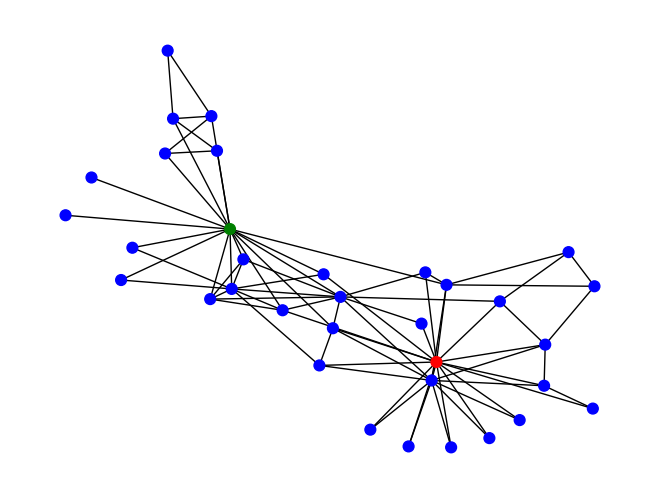

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

options = {
    'node_color': ['green'] + ['blue'] * 32 + ['red'],
    'edge_color': 'black',
    'node_size': 60,
    'width': 1,
}

nx_g = g.to_networkx().to_undirected()
nx.draw(nx_g, **options)


Creamos el modelo de la GNN usando PyTorch. Usamos una función de agregación de suma y una capa densa para actualizar las incrustaciones de los nodos.

In [14]:
import torch.nn as nn
import dgl.function as fn

class MessagePassingLayer(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(MessagePassingLayer, self).__init__()
        self.linear = nn.Linear(in_dim, out_dim)
    
    def forward(self, g, node_features):
        # Apply linear transformation
        #node_features = self.linear(node_features)
        
        g.ndata['h'] = node_features

        # Send messages to neighbors and aggregate them
        #g.send(g.edges(), fn.copy_src(src='h', out='m'))
        #g.recv(g.nodes(), fn.sum(msg='m', out='h'))

        g.send_and_recv(g.edges(), fn.copy_src(src='h', out='m'), fn.sum(msg='m', out='h'))
        
        # Return new node features
        #return g.ndata['h']

        h = g.ndata.pop('h')
        return self.linear(h)

Ahora creamos el modelo de la GNN con dos capas de paso de mensajes y función de activación ReLU.

In [15]:
import torch

class GNN(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super(GNN, self).__init__()
        self.layer1 = MessagePassingLayer(in_dim, hidden_dim)
        self.layer2 = MessagePassingLayer(hidden_dim, out_dim)
    
    def forward(self, g, node_features):
        node_features = self.layer1(g, node_features)
        node_features = torch.relu(node_features)
        node_features = self.layer2(g, node_features)
        return node_features

Entrenamiento del modelo:

In [16]:
import torch.nn.functional as F

classes = [0, 1]
hidden_dim = 5

net = GNN(g.num_nodes(), hidden_dim, len(classes))
inputs = torch.eye(g.num_nodes())
labeled_nodes = torch.tensor([0, 33])  # Only the instructor and the president nodes are labeled
labels = torch.tensor([0, 1])  # Their labels are different

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

for epoch in range(20):
    logits = net(g, inputs)
    logp = F.log_softmax(logits, 1)
    loss = F.nll_loss(logp[labeled_nodes], labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print('Epoch %d | Loss: %.4f' % (epoch, loss.item()))

c:\Users\icira\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: module 'dgl.function' has no attribute 'copy_src'

In [17]:
from sklearn.metrics import classification_report

net.eval()
logits = net(g, inputs)
logp = F.log_softmax(logits, 1).argmax(dim=1)

karate_club_dataset = dgl.data.KarateClubDataset()
ground_truth = karate_club_dataset[0].ndata['label']

print(
    classification_report(
        ground_truth.tolist(), 
        logp.tolist(), 
        target_names=['Instructor', 'President']
    )
)


AttributeError: module 'dgl.function' has no attribute 'copy_src'

# Graph Neural Networks: Cora Dataset

In [1]:
import os
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
import torch
from torch import Tensor
import torch_geometric
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import Planetoid
import networkx as nx
from networkx.algorithms import community
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data_dir = "./data"
os.makedirs(data_dir, exist_ok=True)

c:\Users\icira\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = Planetoid(root=data_dir, name='Cora')
data = dataset[0]

Processing...
Done!


In [3]:
print(f'Number of nodes: {data.num_nodes}')
# Number of nodes: 2708

Number of nodes: 2708


In [4]:
print(f'Number of edges: {data.num_edges}')
# Number of edges: 10556

Number of edges: 10556


In [5]:
print(f'Has isolated nodes: {data.has_isolated_nodes()}')  # False
print(f'Has self-loops: {data.has_self_loops()}')  # False
print(f'Is undirected: {data.is_undirected()}')  # True

Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [6]:
edge_index = data.edge_index.numpy()
print(edge_index.shape)
edge_example = edge_index[:, np.where(edge_index[0]==30)[0]]
edge_example

(2, 10556)


array([[  30,   30,   30,   30,   30,   30],
       [ 697,  738, 1358, 1416, 2162, 2343]], dtype=int64)

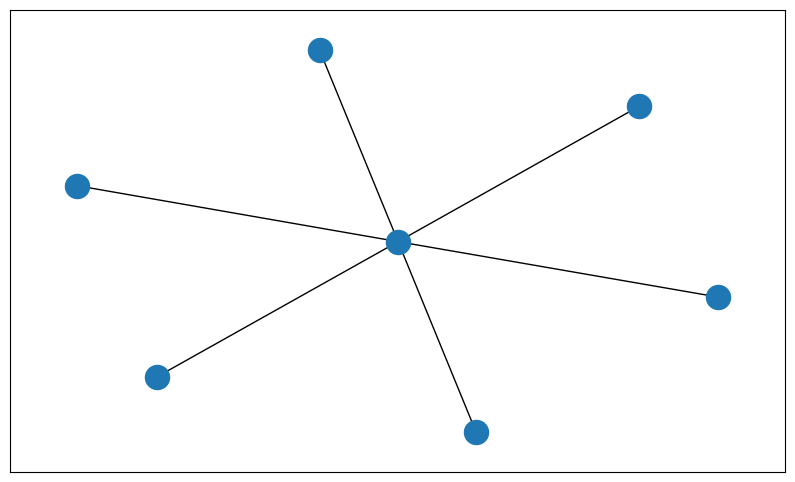

In [7]:
node_example = np.unique(edge_example.flatten())
plt.figure(figsize=(10, 6))
G = nx.Graph()
G.add_nodes_from(node_example)
G.add_edges_from(list(zip(edge_example[0], edge_example[1])))
nx.draw_networkx(G, with_labels=False)

In [8]:
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
# Average node degree: 3.90

Average node degree: 3.90


,count,mean,std,min,25%,50%,75%,max
0,2708.0,3.9,5.23,1.0,2.0,3.0,5.0,168.0


2708
10556


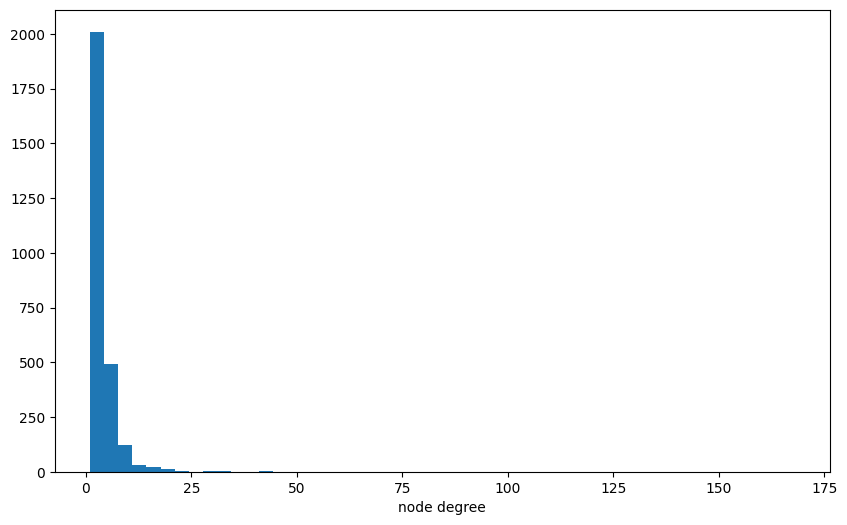

In [9]:
G = to_networkx(data, to_undirected=True)
degrees = [val for (node, val) in G.degree()]
display(pd.DataFrame(pd.Series(degrees).describe()).transpose().round(2))
print(len(degrees))
print(sum(degrees))
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50)
plt.xlabel("node degree")
plt.show()

threshold 0.011821204285186553


c:\Users\icira\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\drawing\nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


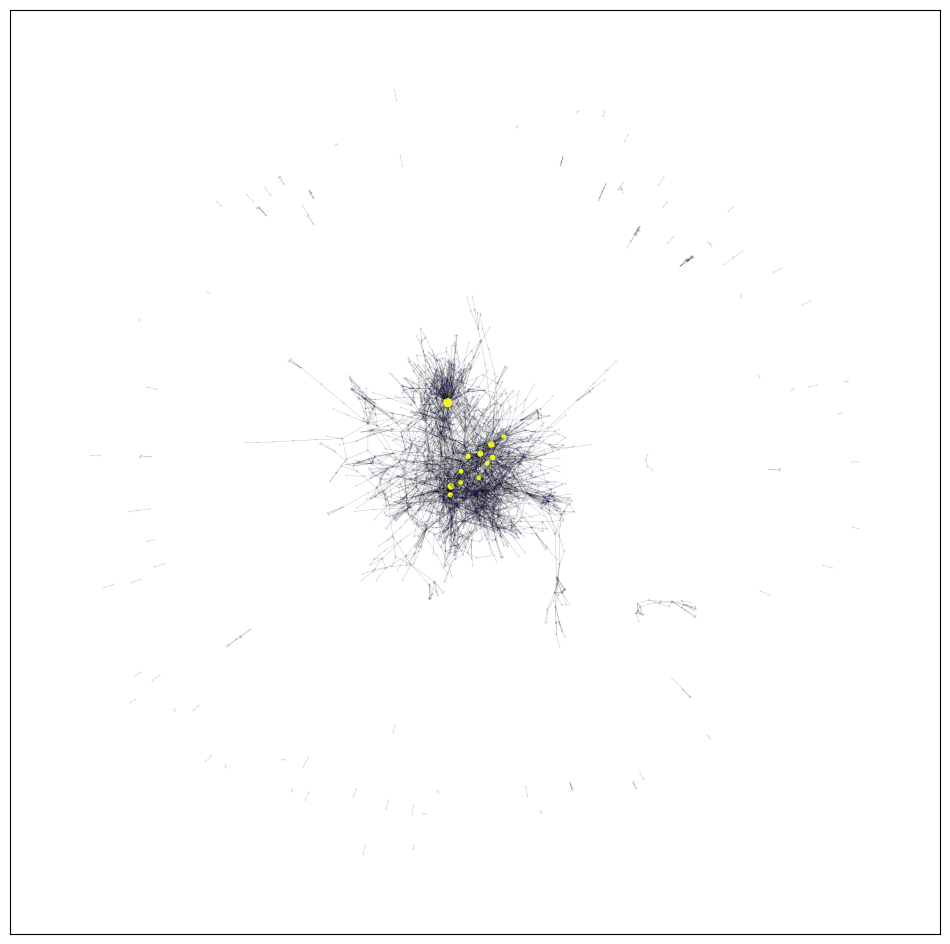

In [10]:
G = to_networkx(data, to_undirected=True)
pos = nx.spring_layout(G, seed=42)
cent = nx.degree_centrality(G)
node_size = list(map(lambda x: x * 500, cent.values()))
cent_array = np.array(list(cent.values()))
threshold = sorted(cent_array, reverse=True)[10]
print("threshold", threshold)
cent_bin = np.where(cent_array >= threshold, 1, 0.1)
plt.figure(figsize=(12, 12))
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size,
                               cmap=plt.cm.plasma,
                               node_color=cent_bin,
                               nodelist=list(cent.keys()),
                               alpha=cent_bin)
edges = nx.draw_networkx_edges(G, pos, width=0.25, alpha=0.3)
plt.show()

In [11]:
print(f'Number of features: {data.num_node_features}')
# Number of edge features: 0

Number of features: 1433
